<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_10_Euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio: Simulación de un Péndulo Simple con el Método de Euler y RungeKutta

## Objetivo
Simular el movimiento de un péndulo simple utilizando el método de Euler y Runge Kutta para resolver las ecuaciones diferenciales que describen su movimiento.

## Descripción del Péndulo Simple
Un péndulo simple consiste en una masa puntual suspendida de un hilo inextensible y sin masa. La masa oscila bajo la influencia de la gravedad, describiendo un movimiento armónico para pequeñas amplitudes.

## Ecuaciones del Movimiento
Las ecuaciones de movimiento de un péndulo simple amortiguado, considerando un ángulo  $($theta$), son:

1. Ecuación diferencial de la posición angular:



2. La ecuación diferencial se puede separar en dos ecuaciones de primer orden:

\begin{equation}
\frac{d\theta}{dt} = \omega
\end{equation}
   
\begin{equation}
\frac{d\omega}{dt} = -\frac{g}{L}\sin(\theta)  -  \frac{b}{Lm}ω
\end{equation}

   donde $\theta$ es el ángulo de desplazamiento y $\omega$ es la velocidad angular.

## Parámetros
- $g$: Aceleración debido a la gravedad (9.81 $m/s^2$)
- $L$: Longitud del hilo del péndulo (en metros)
- $\theta_0$: Ángulo inicial de desplazamiento (en radianes)
- $\omega_0$: Velocidad angular inicial (en radianes/segundo)
- $\Delta t$: Paso de tiempo para la simulación (en segundos)
- $t_{max}$: Tiempo máximo de simulación (en segundos)

## Instrucciones
1. **Inicialización**:
   - Establezca los valores iniciales: $\theta = \theta_0$ y $\omega = \omega_0$.
   - Defina el intervalo de tiempo $\Delta t$ y el tiempo total de simulación $t_{max}$.

2. **Aplicación del Método de Euler y Runge Kutta**:
   - Construya una función con funciones a integrar
   - Construya una función con el método euler y otra para el metodo de rungekutta.
   - Emplee la librería de integración odeint para validar la solución numérica.  
   - Emplee la solución teórica para validar todos los resultados anteriores.
     
3. **Resultados**:
   - Registre los valores de $\theta$ y $\omega$ para cada instante de tiempo.
   - Grafique $\theta$ y $\omega$ en función del tiempo para visualizar el movimiento del péndulo.
   - Encuentre una expresión para determinar la energía cinética, potencial y total del péndulo simple.

## Funciones a Implementar

### 1. `fun`: Función de las Ecuaciones del Péndulo Simple
Esta función calcula las derivadas de las variables de estado $\theta$ y $\omega\$ en un instante dado.


```python
def fun(theta, omega, g, L):
    """
    Calcula las derivadas del ángulo y la velocidad angular para un péndulo simple.

    Args:
        theta (float): Ángulo de desplazamiento (en radianes).
        omega (float): Velocidad angular (en radianes/segundo).
        g (float): Aceleración debida a la gravedad (en m/s²).
        L (float): Longitud del hilo del péndulo (en metros).

    Returns:
        Array: Derivadas de theta y omega.
    """
    dtheta_dt = ...
    domega_dt = ...
    return np.array([dtheta_dt, domega_dt])
```

## Preguntas
1. ¿Cómo afecta el paso de tiempo Δt a la precisión de la simulación?
2. ¿Qué sucede si el ángulo inicial $\theta_0$   no es pequeño? ¿Sigue siendo válida la aproximación $\sin \theta \approx \theta$
3. ¿Cómo varía el movimiento del péndulo con respecto a los parámetros $L$ y $\theta_0$
4. ¿Qué observas en la energía del sistema a lo largo del tiempo? ¿Se conserva?
5. ¿Qué diferencias encuentras si comparas los resultados obtenidos con el método de Euler con los obtenidos utilizando métodos más precisos él de Runge-Kutta?
6. Realizar una animación para del movimiento del pendulo simple, con las soluciones dadas en el metodo de RungeKutta.

Presentado por Joan Mauricio Yanza Ruiz

###SOLUCION###

1. **Inicialización**:
   - Establezca los valores iniciales: $\theta = \theta_0$ y $\omega = \omega_0$.
   - Defina el intervalo de tiempo $\Delta t$ y el tiempo total de simulación $t_{max}$.

In [238]:
!pip install -Uq celluloid

In [297]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from celluloid import Camera
from IPython.display import HTML
from matplotlib.lines import Line2D

In [290]:
# Parametros

theta_0 = np.pi/3
w_0 = 0
delta_t  = 0.01
ta =0
t_max = 30
b = 0.6
m = 1
g = 9.81
L = 1
L_an = L
n = int((t_max-ta)/delta_t)
t = np.linspace(ta,t_max,n)


2. **Aplicación del Método de Euler y Runge Kutta**:
   - Construya una función con funciones a integrar
   - Construya una función con el método euler y otra para el metodo de rungekutta.
   - Emplee la librería de integración odeint para validar la solución numérica.  
   - Emplee la solución teórica para validar todos los resultados anteriores.
     

Metodo de euler

In [241]:
def fun(theta, omega, g, b,m,L,t):
    """
    Calcula las derivadas del ángulo y la velocidad angular para un péndulo simple.

    Args:
        theta (float): Ángulo de desplazamiento (en radianes).
        omega (float): Velocidad angular (en radianes/segundo).
        g (float): Aceleración debida a la gravedad (en m/s²).
        L (float): Longitud del hilo del péndulo (en metros).

    Returns:
        Array: Derivadas de theta y omega.
    """

    dtheta_dt = omega
    domega_dt = (-g / L)*np.sin(theta) - (b/(L*m))* omega
    vector = np.array([dtheta_dt, domega_dt])
    return vector

In [242]:
omegas = np.zeros((n))
thetas = np.zeros((n))
params=(g, b,m,L,t)
thetas[0] = theta_0
omegas[0] = w_0
y0=np.array([theta_0, w_0])


In [243]:
def euler(f,omegas,thetas, delta_t):
  for i in range(0,n-1):
    thetas[0] = theta_0
    omegas[0] = w_0
    thetas[i+1] = thetas[i] + delta_t * f(thetas[i],omegas[i],g, b,m,L,t)[0]
    omegas[i+1] = omegas[i] + delta_t * f(thetas[i],omegas[i],g, b,m,L,t)[1]
  return thetas*180/np.pi,omegas

In [244]:
angulos, ve_angular = euler(fun,omegas,thetas,delta_t)

Con odeint

In [245]:
############# Odeint #####################

def fun2(y0,t, g, b,m,L):
    """
    Calcula las derivadas del ángulo y la velocidad angular para un péndulo simple.

    Args:
        theta (float): Ángulo de desplazamiento (en radianes).
        omega (float): Velocidad angular (en radianes/segundo).
        g (float): Aceleración debida a la gravedad (en m/s²).
        L (float): Longitud del hilo del péndulo (en metros).

    Returns:
        Array: Derivadas de theta y omega.
    """
    theta=y0[0]
    omega=y0[1]
    dtheta_dt = omega
    domega_dt = (-g / L)*np.sin(theta) - (b/(L*m))* omega
    vector = np.array([dtheta_dt,domega_dt])
    return vector

In [246]:
ang_od = odeint(fun2, y0, t, args=(g,b,m,L))


Runge Kutta

In [247]:
def omega_t(t,omega,theta):
  f = (-g / L)*np.sin(theta) - (b/(L*m))* omega
  return f


In [248]:
def RK4(f, delta_t):
  omegas2= np.zeros(n)
  thetas2= np.zeros(n)
  thetas2[0] = theta_0
  for i ,tn in enumerate(t[0:-1]):
      k1 = f(tn, omegas2[i],thetas2[i])
      k2 = f(tn+ 0.5* delta_t, omegas2[i] + 0.5* k1* delta_t,thetas2[i])
      k3 = f(tn+ 0.5* delta_t,omegas2[i] + 0.5* k2* delta_t,thetas2[i] )
      k4 = f(tn + delta_t, omegas2[i]  + k3* delta_t,thetas2[i])
      omegas2[i+1] = omegas2[i] + (1/6)*delta_t* (k1 + 2*k2 + 2*k3 + k4)
      thetas2[i+1] = thetas2[i] + omegas2[i+1] * delta_t
  return (thetas2 * 180/np.pi),omegas2

In [249]:
rk =RK4(omega_t, delta_t)

Teorico

In [250]:
def theta_teorica(t, b, L, m):
  alfa = -b / (2 * L* m)
  beta = ((abs(((b**2)/((L*m)**2) - 4*(g/L))))**0.5) / 2
  A = theta_0
  B = (-alfa * A  / beta)
  exponencial = np.exp(alfa*t)
  primer_termino = A * np.cos(beta * t ) + B * np.sin(beta * t )
  theta = exponencial * (primer_termino)

  return theta * 180 / np.pi


In [251]:
def omega_theorica(t, b, L, m):
  alfa = -b / (2 * L* m)
  beta = ((abs(((b**2)/((L*m)**2) - 4*(g/L))))**0.5) / 2
  A = theta_0
  B = (-alfa * A  / beta)
  exponencial = np.exp(alfa*t)
  primer_sumando = alfa * exponencial * ( A * np.cos(beta * t ) + B * np.sin(beta * t ) )
  segundo_sumando = exponencial * (-beta * A * np.sin(beta*t) + beta * B * np.cos(beta * t ))
  omega = primer_sumando  + segundo_sumando
  return omega


In [252]:
theta_teo =theta_teorica(t, b, L, m)
omega_teo = omega_theorica(t, b, L, m)

3. **Resultados**:
   - Registre los valores de $\theta$ y $\omega$ para cada instante de tiempo.
   - Grafique $\theta$ y $\omega$ en función del tiempo para visualizar el movimiento del péndulo.
   - Encuentre una expresión para determinar la energía cinética, potencial y total del péndulo simple.


Grafica posicion angular vs tiempo

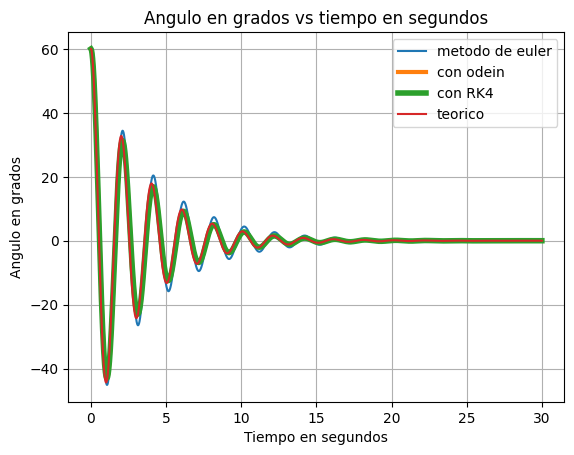

In [253]:
plt.plot(t,angulos, label="metodo de euler")
plt.plot(t,ang_od[:,0]*180/np.pi,linewidth=3,label="con odein")
plt.plot(t,rk[0], linewidth=4,label="con RK4")
plt.plot(t,theta_teo, label = "teorico")
plt.xlabel("Tiempo en segundos")
plt.ylabel("Angulo en grados")
plt.title("Angulo en grados vs tiempo en segundos")
plt.grid()
plt.legend()
plt.show();

Grafica rapidez angular vs tiempo

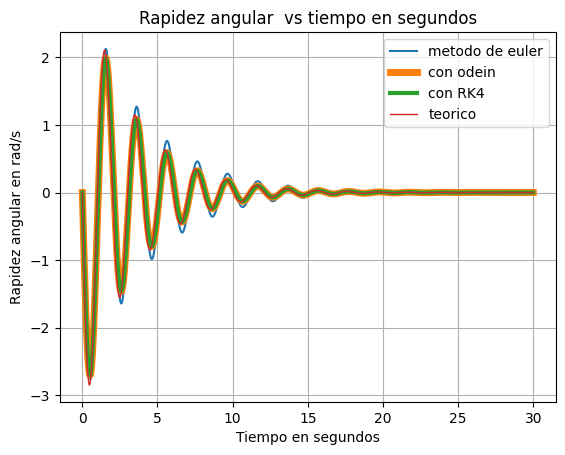

In [254]:
plt.plot(t,ve_angular, label="metodo de euler")
plt.plot(t,ang_od[:,1],linewidth=5,label="con odein")
plt.plot(t,rk[1], linewidth=3,label="con RK4")
plt.plot(t,omega_teo, linewidth=1,label="teorico")
plt.xlabel("Tiempo en segundos")
plt.ylabel("Rapidez angular en rad/s")
plt.title("Rapidez angular  vs tiempo en segundos")
plt.grid()
plt.legend()
plt.show();

###Encuentre una expresión para determinar la energía cinética, potencial y total del péndulo simple.###

Modelo teorico

En el pendulo simple la energia potencial es:
$ Ep = mgL(1- cos(\theta)) $ donde:

$$\theta = (exp(-αt))(Acos(βt) + Bsin(βt))) $$,


este resultado  se obtiene si se aproxima $sin(\theta)$ a $θ$ y si  se emplea la ecuacion diferencial:

$$ \frac{d^2θ}{dt^2} + \frac{b}{Lm}\frac{dθ}{dt} + \frac{g}{L}θ =0  $$

Los valores de $α$ y $β$ se obtienen de la ecuación caracteristica que se obtiene de la anterior expresión. A y B se hallaron anteriormente  a partir de las condiciones iniciales del angulo $\theta$ y rapidez angular $ω$. Reemplazando en la expresión de la energia potencial se puede establecer una relación entre el tiempo y la energia potencial:



$$ Ep = mgL(1- cos((exp(-αt))Acos(βt) + Bsin(βt))) $$

Tomado de https://lilith.fisica.ufmg.br/~wag/transf/TEACHING/FISICA_ANGELGARCIA/oscilaciones/pendulo2/pendulo2.htm

In [255]:
def energia_potencial(t):
  alfa = -b / (2 * L* m)
  beta = ((abs(((b**2)/((L*m)**2) - 4*(g/L))))**0.5) / 2
  A = theta_0
  B = (-alfa * A  / beta)
  argumento = np.exp(alfa*t) * ((A*np.cos(beta*t)) + B* np.sin(beta*t))
  Ep = m* g* L * (1- np.cos(argumento))
  return Ep

La energia cinetica es igual a :
\begin{equation}
E_k = \frac{1}{2} m v^2
\end{equation}

para un movimiento del pendulo:
\begin{equation}
E_k = \frac{1}{2} m L^2 \omega^2
\end{equation}

como el angulo es:
$$\theta = (exp(-αt))(Acos(βt) + Bsin(βt))) $$

entonces su derivada con respecto al tiempo es:

\begin{equation}
\omega = e^{-\alpha t} \left[(-\alpha A + B \beta) \cos(\beta t) + (-\alpha B - A \beta) \sin(\beta t)\right]
\end{equation}

se reemmplaza esta expresiòn en la segunda para hallar la energia cinetica

In [256]:
def energia_cinetica(t):
  alfa = -b / (2 * L* m)
  beta = ((abs(((b**2)/((L*m)**2) - 4*(g/L))))**0.5) / 2
  A = theta_0
  B = (-alfa * A  / beta)
  exponencial = np.exp(alfa*t)
  primer_sumando = alfa * exponencial * ( A * np.cos(beta * t ) + B * np.sin(beta * t ) )
  segundo_sumando = exponencial * (-beta * A * np.sin(beta*t) + beta * B * np.cos(beta * t ))
  omega = primer_sumando  + segundo_sumando
  ek = 0.5 * m* (L**2) *(omega**2)
  return ek


La energia mecanica es igual a la suma de la energia potencial gravitacional y la energia cinetica

In [257]:
ep = energia_potencial(t)
ek = energia_cinetica(t)
e_mecanica  = ep +ek


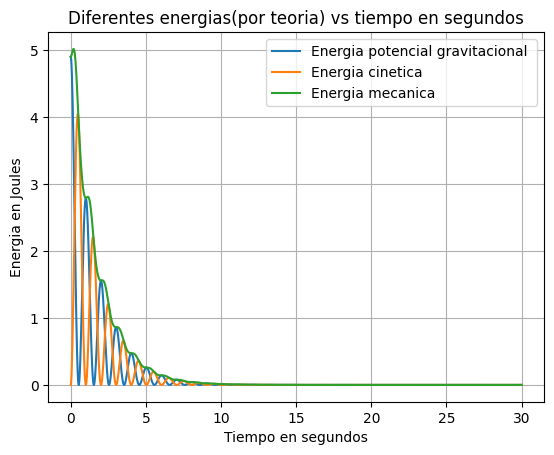

In [258]:
plt.plot(t,ep, label ="Energia potencial gravitacional ")
plt.plot(t,ek, label="Energia cinetica")
plt.plot(t,e_mecanica, label = "Energia mecanica ")
plt.xlabel("Tiempo en segundos")
plt.ylabel("Energia en Joules")
plt.title("Diferentes energias(por teoria) vs tiempo en segundos")
plt.grid()
plt.legend()
plt.show();


La energia total es igual a la energia mecanica mas la disipada por la friccion. La energia total se calcula a partir del momento en que se deja caer el pendulo desde una velocidad angular de cero y un angulo inicial de $\theta_0$ entonces la energia total del sistema es igual a la energia potencial gravitacional en tiempo igual a cero

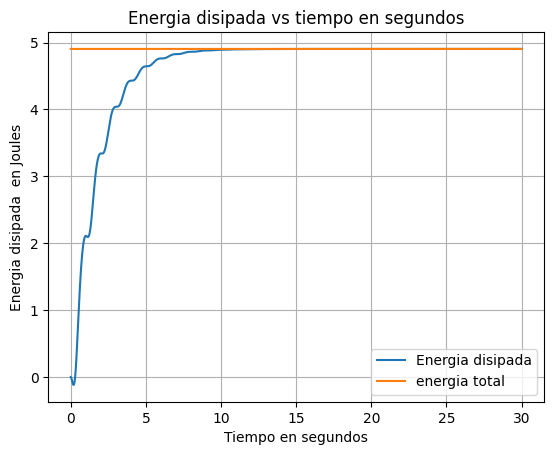

In [259]:
energia_total = m * g * L * (1- np.cos(theta_0))
energia_disipada = energia_total-e_mecanica
plt.plot(t,energia_disipada, label ="Energia disipada")
plt.plot(t, energia_disipada + e_mecanica, label ="energia total")
plt.xlabel("Tiempo en segundos")
plt.ylabel("Energia disipada  en Joules")
plt.title("Energia disipada vs tiempo en segundos")
plt.grid()
plt.legend()
plt.show();

Energias potencial, cinetica y total con RK4

In [260]:
Ep_rk = m * g *L * (1-np.cos(rk[0]*np.pi/180))
Ek_rk = 0.5 * m* (L**2) *(rk[1])**2
E_mecanica_rk = Ep_rk + Ek_rk



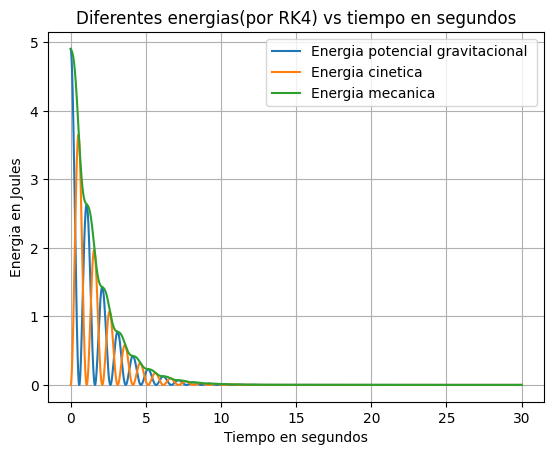

In [261]:
plt.plot(t,Ep_rk, label ="Energia potencial gravitacional ")
plt.plot(t,Ek_rk, label="Energia cinetica")
plt.plot(t,E_mecanica_rk, label = "Energia mecanica ")
plt.xlabel("Tiempo en segundos")
plt.ylabel("Energia en Joules")
plt.title("Diferentes energias(por RK4) vs tiempo en segundos")
plt.grid()
plt.legend()
plt.show();

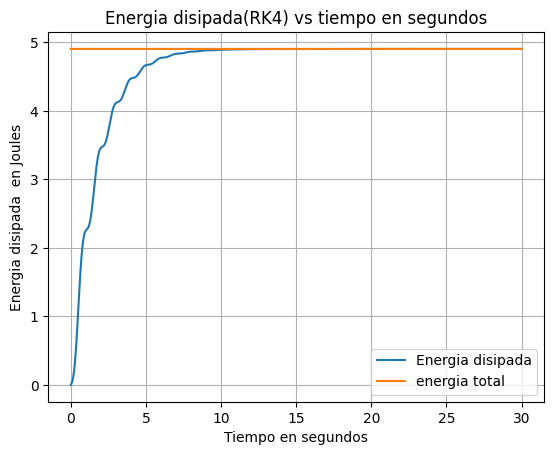

In [262]:
energia_total = m * g * L * (1- np.cos(theta_0))
energia_disipada_rk = energia_total-E_mecanica_rk
plt.plot(t,energia_disipada_rk, label ="Energia disipada")
plt.plot(t, energia_disipada_rk + E_mecanica_rk, label ="energia total")
plt.xlabel("Tiempo en segundos")
plt.ylabel("Energia disipada  en Joules")
plt.title("Energia disipada(RK4) vs tiempo en segundos")
plt.grid()
plt.legend()
plt.show();

Ahora las comparaciones entre las energias dadas por RK4 y las ecuaciones teoricas

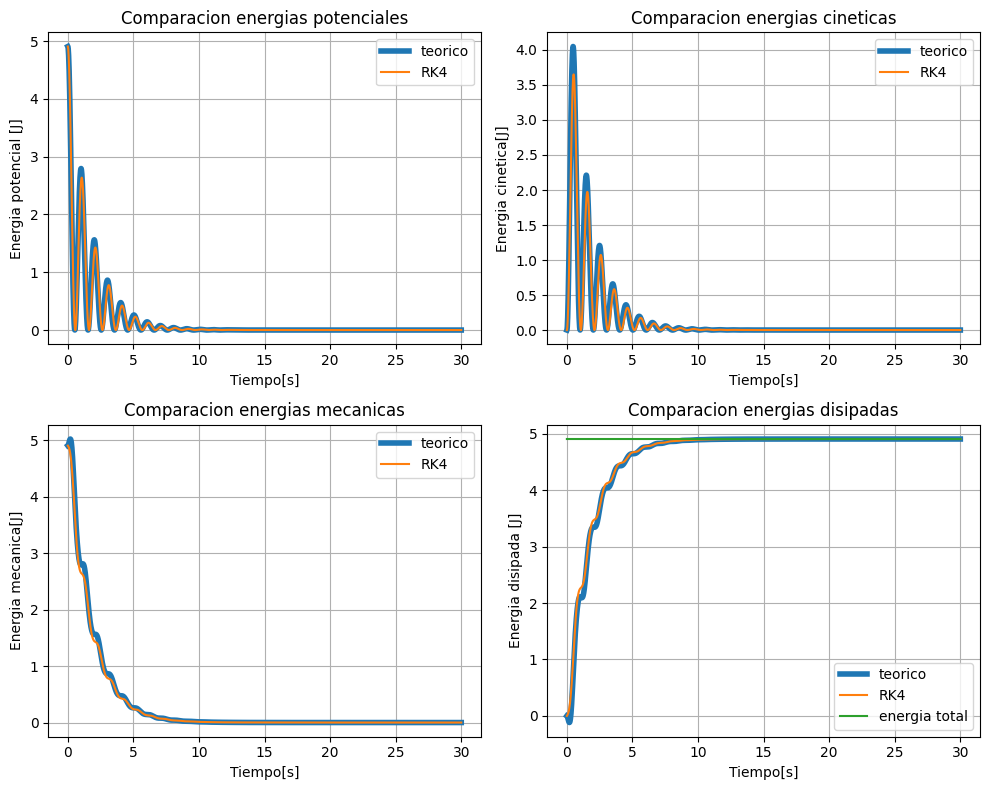

In [263]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].plot(t, ep, linewidth=4, label="teorico")
axs[0, 0].plot(t, Ep_rk, label="RK4")
axs[0, 0].set_title("Comparacion energias potenciales")
axs[0, 0].set_ylabel("Energia potencial [J]")
axs[0, 0].set_xlabel("Tiempo[s]")
axs[0, 0].grid(True)
axs[0, 0].legend()
axs[0, 1].plot(t, ek, linewidth=4, label="teorico")
axs[0, 1].plot(t, Ek_rk, label="RK4")
axs[0, 1].set_title("Comparacion energias cineticas")
axs[0, 1].set_ylabel("Energia cinetica[J]")
axs[0, 1].set_xlabel("Tiempo[s]")
axs[0, 1].grid(True)
axs[0, 1].legend()

axs[1, 0].plot(t, e_mecanica, linewidth=4, label="teorico")
axs[1, 0].plot(t, E_mecanica_rk, label="RK4")
axs[1, 0].set_title("Comparacion energias mecanicas")
axs[1, 0].set_ylabel("Energia mecanica[J]")
axs[1, 0].set_xlabel("Tiempo[s]")
axs[1, 0].grid(True)
axs[1, 0].legend()


axs[1, 1].plot(t, energia_disipada, linewidth=4, label="teorico")
axs[1, 1].plot(t, energia_disipada_rk, label="RK4")
axs[1, 1].plot(t, energia_disipada_rk + E_mecanica_rk, label="energia total")
axs[1, 1].set_title("Comparacion energias disipadas")
axs[1, 1].set_ylabel("Energia disipada [J]")
axs[1, 1].set_xlabel("Tiempo[s]")
axs[1, 1].grid(True)
axs[1, 1].legend()


plt.tight_layout()

# Mostrar el gráfico
plt.show()


Se observa que las graficas d energia  obtenidas por RK4 y por el modelo teorico coinciden


## Preguntas
1. ¿Cómo afecta el paso de tiempo Δt a la precisión de la simulación?
2. ¿Qué sucede si el ángulo inicial $\theta_0$   no es pequeño? ¿Sigue siendo válida la aproximación $\sin \theta \approx \theta$
3. ¿Cómo varía el movimiento del péndulo con respecto a los parámetros $L$ y $\theta_0$
4. ¿Qué observas en la energía del sistema a lo largo del tiempo? ¿Se conserva?
5. ¿Qué diferencias encuentras si comparas los resultados obtenidos con el método de Euler con los obtenidos utilizando métodos más precisos él de Runge-Kutta?
6. Realizar una animación para del movimiento del pendulo simple, con las soluciones dadas en el metodo de RungeKutta.

¿Cómo afecta el paso de tiempo Δt a la precisión de la simulación?

In [264]:
""" ṕara el metodo de euler"""
deltas_t = np.array([0.01,0.012])
angulos_dt = np.zeros((2,len(omegas)))
omegas_dt = np.zeros((2,len(omegas)))
for i, j in enumerate(deltas_t):
  angulos_dt[i,:]= euler(fun,omegas,thetas,j)[0]
  omegas_dt[i,:]= euler(fun,omegas,thetas,j)[1]

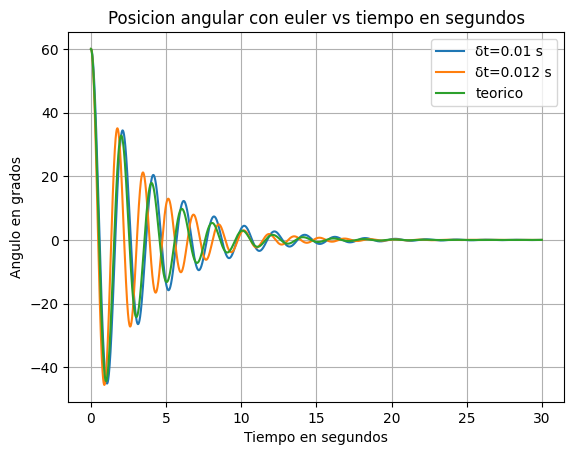

In [265]:
plt.plot(t,angulos_dt[0,:], label=f"δt={deltas_t[0]} s")
plt.plot(t,angulos_dt[1,:],label=f"δt={deltas_t[1]} s")
plt.plot(t,theta_teo, label = "teorico")
plt.xlabel("Tiempo en segundos")
plt.ylabel("Angulo en grados")
plt.title("Posicion angular con euler vs tiempo en segundos")
plt.grid()
plt.legend()
plt.show();

Como se observa en la grafica anterior , un ligero aumento del $Δ_t$ hace que la curva de posicion angular vs tiempo en segundos se aleje de la teorica

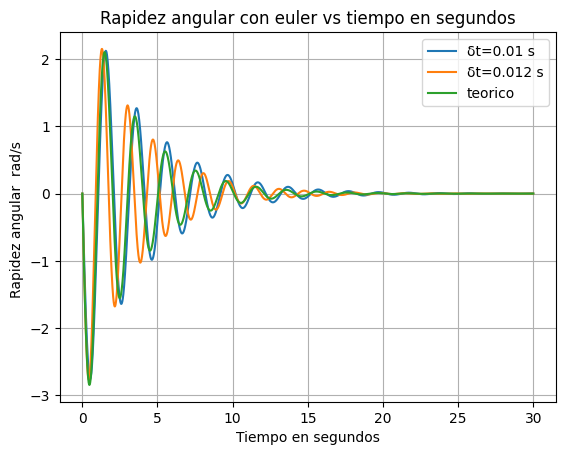

In [266]:
plt.plot(t,omegas_dt[0,:], label=f"δt={deltas_t[0]} s")
plt.plot(t,omegas_dt[1,:],label=f"δt={deltas_t[1]} s")
plt.plot(t,omega_teo, label = "teorico")
plt.xlabel("Tiempo en segundos")
plt.ylabel("Rapidez angular  rad/s ")
plt.title("Rapidez angular con euler vs tiempo en segundos")
plt.grid()
plt.legend()
plt.show();

La situacion es analoga con la rapidez angular como se muestra en la anterior grafica

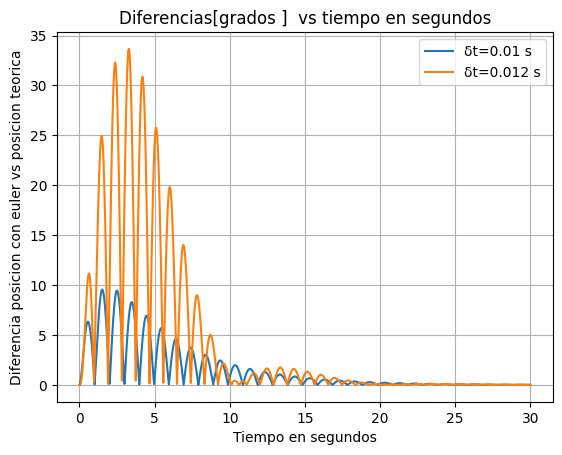

In [267]:
""" diferencias de las posiciones angulares obtenidas con euler  con  las obtenidas con  la teoria"""
plt.plot(t,abs(angulos_dt[0,:]-theta_teo), label=f"δt={deltas_t[0]} s")
plt.plot(t,abs(angulos_dt[1,:]-theta_teo),label=f"δt={deltas_t[1]} s")
plt.xlabel("Tiempo en segundos")
plt.ylabel("Diferencia posicion con euler vs posicion teorica")
plt.title("Diferencias[grados ]  vs tiempo en segundos")
plt.grid()
plt.legend()
plt.show();

A medida que se aumenta el delta del tiempo la precision se hace menor con el metodo de euler, ocurre algo analogo con la rapidez angular. Ahora se evalua RK4

In [268]:
angulos_r = np.zeros((2,len(omegas)))
omegas_r = np.zeros((2,len(omegas)))
for i, j in enumerate(deltas_t):
  angulos_r[i,:]= RK4(omega_t,j)[0]
  omegas_r[i,:]= RK4(omega_t,j)[1]

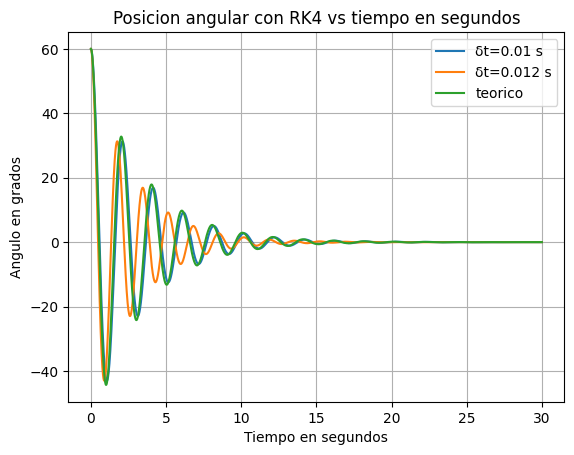

In [269]:
plt.plot(t,angulos_r[0,:], label=f"δt={deltas_t[0]} s")
plt.plot(t,angulos_r[1,:],label=f"δt={deltas_t[1]} s")
plt.plot(t,theta_teo, label = "teorico")
plt.xlabel("Tiempo en segundos")
plt.ylabel("Angulo en grados")
plt.title("Posicion angular con RK4 vs tiempo en segundos")
plt.grid()
plt.legend()
plt.show();

Se observa que para RK4 con  un delta de tiempo de 0.01 s la curva de posicion angular vs tiempo coindice con la teorica, lo que hace suponer una mayor precision que Euler.

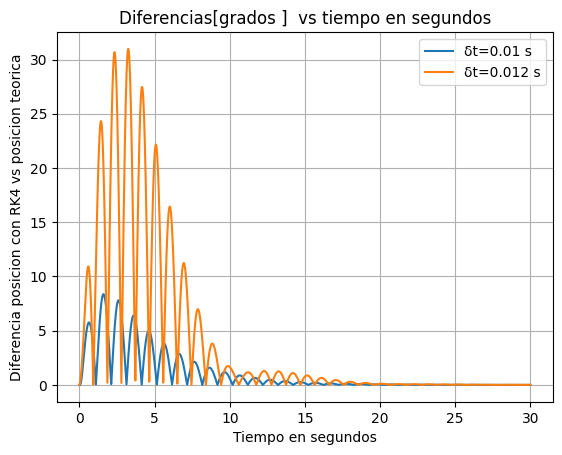

In [270]:
""" diferencias de las posiciones angulares obtenidas con RK4  con  las obtenidas con  la teoria"""
plt.plot(t,abs(angulos_r[0,:]-theta_teo), label=f"δt={deltas_t[0]} s")
plt.plot(t,abs(angulos_r[1,:]-theta_teo),label=f"δt={deltas_t[1]} s")
plt.xlabel("Tiempo en segundos")
plt.ylabel("Diferencia posicion con RK4 vs posicion teorica")
plt.title("Diferencias[grados ]  vs tiempo en segundos")
plt.grid()
plt.legend()
plt.show();

A medida que aumenta el delta del tiempo la precision es menor tambien en RK4, solo que RK4 presenta mayor precision que Euler ya que las diferencias  entre las posiciones angulares obtenidas por el metodo Rk4 y el teorico son menores que aquellas proporcionada por el metodo de Euler. Se aplica lo mismo para la rapidez angular en RK4

**¿Qué sucede si el ángulo inicial $\theta_0$   no es pequeño? ¿Sigue siendo válida la aproximación $\sin \theta \approx \theta$**

In [271]:
thetas_0 = np.array([np.pi/18, np.pi/4, np.pi/3])
def euler2(f,omegas,thetas, delta_t,theta_0):
  for i in range(0,n-1):
    thetas[0] = theta_0
    omegas[0] = w_0
    thetas[i+1] = thetas[i] + delta_t * f(thetas[i],omegas[i],g, b,m,L,t)[0]
    omegas[i+1] = omegas[i] + delta_t * f(thetas[i],omegas[i],g, b,m,L,t)[1]
  return thetas*180/np.pi,omegas

In [272]:
angulos_t = np.zeros((3,len(omegas)))
omegas_t = np.zeros((3,len(omegas)))
for i, j in enumerate(thetas_0):
  angulos_t[i,:]= euler2(fun,omegas,thetas,0.01,thetas_0[i])[0]
  omegas_t[i,:]= euler2(fun,omegas,thetas,0.01,thetas_0[i])[1]

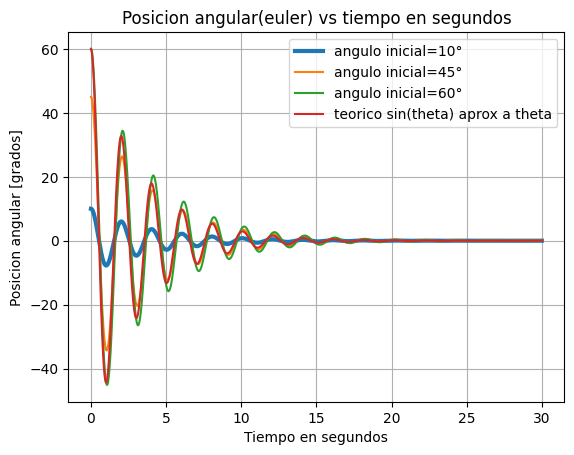

In [273]:
plt.plot(t,angulos_t[0,:],linewidth=3,label=f"angulo inicial=10°")
plt.plot(t,angulos_t[1,:],label=f"angulo inicial=45°")
plt.plot(t,angulos_t[2,:],label=f"angulo inicial=60°")
plt.plot(t,theta_teo, label = "teorico sin(theta) aprox a theta")
plt.xlabel("Tiempo en segundos")
plt.ylabel("Posicion angular [grados]")
plt.title("Posicion angular(euler) vs tiempo en segundos")
plt.grid()
plt.legend()
plt.show();

Con el metodo de euler: Como se observa en la anterior grafica si el angulo inicial no es pequeño, como el caso de 45° y 60°, sus curvas se alejan bastante de la curva teorica. Cabe agregar que se alejan mas a medida que el angulo inicial es mayor, en este caso la aproximacion de $senθ$ a  $\theta$ no es valida. Solo es valida para angulos menores de 15 grados. Como se muestra en la grafica,  con un angulo de 10° la curva obtenida  coindicde con la curva  teorica. Esto aplica tambien para la rapidez angular

In [274]:
### para RK4
def RK4_2(f, delta_t, theta_0):
  omegas2= np.zeros(n)
  thetas2= np.zeros(n)
  thetas2[0] = theta_0
  for i ,tn in enumerate(t[0:-1]):
      k1 = f(tn, omegas2[i],thetas2[i])
      k2 = f(tn+ 0.5* delta_t, omegas2[i] + 0.5* k1* delta_t,thetas2[i])
      k3 = f(tn+ 0.5* delta_t,omegas2[i] + 0.5* k2* delta_t,thetas2[i] )
      k4 = f(tn + delta_t, omegas2[i]  + k3* delta_t,thetas2[i])
      omegas2[i+1] = omegas2[i] + (1/6)*delta_t* (k1 + 2*k2 + 2*k3 + k4)
      thetas2[i+1] = thetas2[i] + omegas2[i+1] * delta_t
  return (thetas2 * 180/np.pi),omegas2

In [275]:
angulos_a = np.zeros((3,len(omegas)))
omegas_a = np.zeros((3,len(omegas)))
for i, j in enumerate(thetas_0):
  angulos_a[i,:]= RK4_2(omega_t,0.01,thetas_0[i])[0]
  omegas_a[i,:]= RK4_2(omega_t,0.01,thetas_0[i])[1]

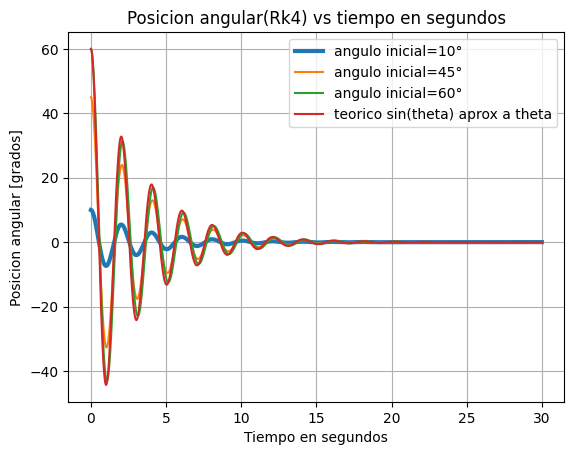

In [276]:
plt.plot(t,angulos_a[0,:],linewidth=3,label=f"angulo inicial=10°")
plt.plot(t,angulos_a[1,:],label=f"angulo inicial=45°")
plt.plot(t,angulos_a[2,:],label=f"angulo inicial=60°")
plt.plot(t,theta_teo, label = "teorico sin(theta) aprox a theta")
plt.xlabel("Tiempo en segundos")
plt.ylabel("Posicion angular [grados]")
plt.title("Posicion angular(Rk4) vs tiempo en segundos")
plt.grid()
plt.legend()
plt.show();

Se obtiene un resultado similar con RK4, por lo que se concluye lo mismo

**¿Cómo varía el movimiento del péndulo con respecto a los parámetros  L  y  θ0**

Para entender como varia el movimiento con respecto a $(θ_0)$ se pueden utilizar las dos graficas anteriores: es evidente que la variacion del angulo inicial no incide en el periodo del pendulo. En todos los casos, sin importar el angulo inicial, el periodo del pendulo fue de aproximadamente el mismo. Esto significa que no afecta  su frecuencia angular. Lo que si afecta, es la amplitud de los movimientos, a mayor angulo inicial se alcanzan mayores amplitudes.Ahora se evula la velocidad angular

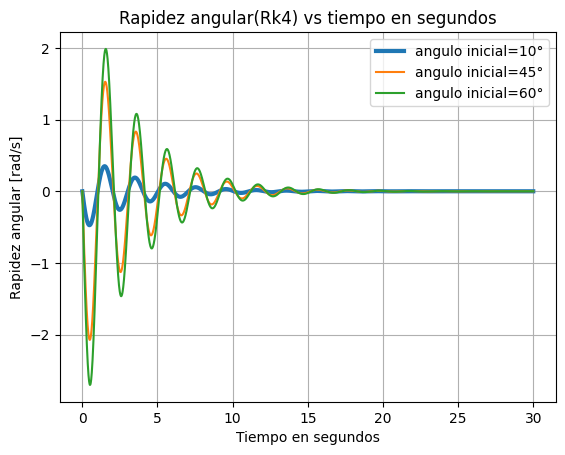

In [277]:
plt.plot(t,omegas_a[0,:],linewidth=3,label=f"angulo inicial=10°")
plt.plot(t,omegas_a[1,:],label=f"angulo inicial=45°")
plt.plot(t,omegas_a[2,:],label=f"angulo inicial=60°")
plt.xlabel("Tiempo en segundos")
plt.ylabel("Rapidez angular [rad/s]")
plt.title("Rapidez angular(Rk4) vs tiempo en segundos")
plt.grid()
plt.legend()
plt.show();

Como se observa en la anterior grafica, si el  angulo inicial es mayor , el pendulo alcanza mayores velocidades angulares sin afectar su periodo

Ahora se varia la longitud de la cuerda

In [278]:

theta_0 = np.pi/18
w_0 = 0
delta_t  = 0.01
ta =0
t_max = 10
b = 0.6
m = 0.5
g = 9.81
n = int((t_max-ta)/delta_t)
t = np.linspace(ta,t_max,n)
L=np.array([1, 2, 5])

In [279]:
omegas = np.zeros((n))
thetas = np.zeros((n))

In [280]:
def euler0(f,omegas,thetas, delta_t):
  for i in range(0,n-1):
    thetas[0] = theta_0
    omegas[0] = w_0
    thetas[i+1] = thetas[i] + delta_t * f(thetas[i],omegas[i],g, b,m,L[0],t)[0]
    omegas[i+1] = omegas[i] + delta_t * f(thetas[i],omegas[i],g, b,m,L[0],t)[1]
  return thetas*180/np.pi,omegas

def euler1(f,omegas,thetas, delta_t):
  for i in range(0,n-1):
    thetas[0] = theta_0
    omegas[0] = w_0
    thetas[i+1] = thetas[i] + delta_t * f(thetas[i],omegas[i],g, b,m,L[1],t)[0]
    omegas[i+1] = omegas[i] + delta_t * f(thetas[i],omegas[i],g, b,m,L[1],t)[1]
  return thetas*180/np.pi,omegas

def euler2(f,omegas,thetas, delta_t):
  for i in range(0,n-1):
    thetas[0] = theta_0
    omegas[0] = w_0
    thetas[i+1] = thetas[i] + delta_t * f(thetas[i],omegas[i],g, b,m,L[2],t)[0]
    omegas[i+1] = omegas[i] + delta_t * f(thetas[i],omegas[i],g, b,m,L[2],t)[1]
  return thetas*180/np.pi,omegas

In [281]:
angulosg0, ve_angularg0 = euler0(fun,omegas,thetas,delta_t)
angulosg1, ve_angularg1 = euler1(fun,omegas,thetas,delta_t)
angulosg2, ve_angularg2 = euler2(fun,omegas,thetas,delta_t)

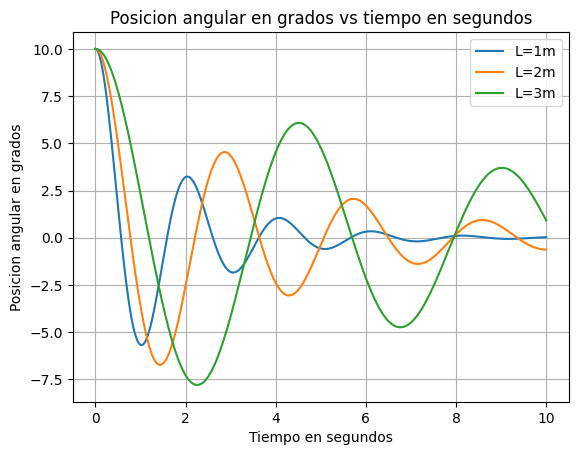

In [282]:
plt.plot(t,angulosg0, label="L=1m")
plt.plot(t,angulosg1, label="L=2m")
plt.plot(t,angulosg2, label="L=3m")
plt.xlabel("Tiempo en segundos")
plt.ylabel("Posicion angular en grados")
plt.title("Posicion angular en grados vs tiempo en segundos")
plt.grid()
plt.legend()
plt.show();

De acuerdo a la anterior grafica si aumentamos la longitud de cuerda, el periodo de las oscilaciones aumenta y la frecuencia angular disminuye.

**4. ¿Qué observas en la energía del sistema a lo largo del tiempo? ¿Se conserva?**

De acuerdo a las graficas de energia que se expusieron  anteriormente, se puede decir lo siguiente:

-Los picos de la energia potencial gravitacional coicinciden con los valles de la energia cinetica, y viceverza, esto significa que cuando la energia cinetica es maxima, la energia potencial es cero o cuando la energia potencial es maxima, la energia cinetica es cero.

-Si se unen los picos de la energia potencial gravitacional y energia cinetica en una curva, esta coincide con la energia mecanica.

-La energia mecanica decae con el trancurso del tiempo de forma exponencial, es decir, no se conserva.


-La energia disipada aumenta de forma exponencial con el transcurso del tiempo hasta un valor techo que es la energia total del sistema.

- La energia total se conserva por la ley de conservacion


**¿Qué diferencias encuentras si comparas los resultados obtenidos con el método de Euler con los obtenidos utilizando métodos más precisos él de Runge-Kutta?**

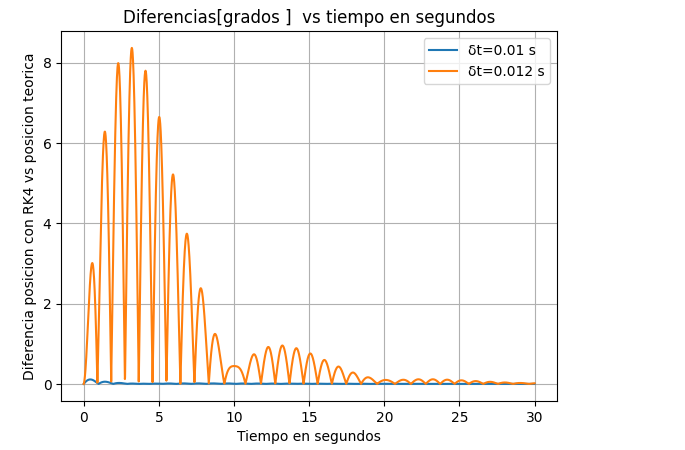

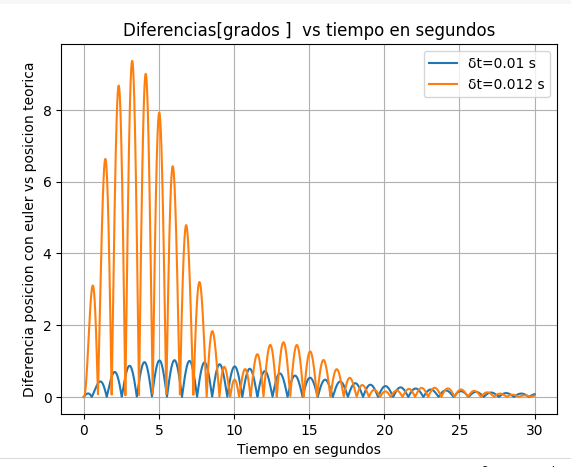

En las anteriores  grafica se observa que las diferencias entre las posiciones angulares  por euler y RK4 y las posiciones obtenidas por ecuaciones teoricas, son menores para RK4 por lo que se puede decir que RK4 es mas preciso que Euler, aunque la precision se hace similar cuando el oscilador se acerca a su estado de reposo final.

**Realizar una animación para del movimiento del pendulo simple, con las soluciones dadas en el metodo de RungeKutta.**

In [291]:
rk_rad = rk[0] * np.pi/180
x= L_an *(np.sin(rk_rad))
y =- L_an * np.cos(rk_rad)


In [336]:
fig = plt.figure(figsize=(5, 5))
fig, ax = plt.subplots()
camara = Camera(fig) # creo el objeto camara con fig
cero= np.array([x[0],0])
pos = np.array([y[0],0])
#hacer el grafico solo del primer punto que aparece enla animacion con las etiquetas
plt.scatter(x[0],y[0],color="black")
plt.scatter(0,0)
plt.plot(cero,pos)
for i in range(1,3000,30):

  plt.scatter(x[i],y[i],color="red")
  cero2= np.array([x[i],0])
  pos2 = np.array([y[i],0])
  plt.plot(cero2,pos2,color="black")

  camara.snap() #toma una foto de cada plot





plt.ylim(-1.1,0)
plt.xlim(-1,1)
plt.xlabel("X en metros")
plt.ylabel("Y en metros")
plt.title("Pendulo simple")
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.close();

<Figure size 500x500 with 0 Axes>

In [337]:
animacion=camara.animate() # hace la animacion
HTML(animacion.to_jshtml())